# NumPy III: Comparisons, Masks and Boolean Logic

*Disclaimer: The contents of this notebook are developped according to Python Data Science Handbook, by Jake VanderPlas and Python for Data Analysis, by Wes McKinney*

### Comparison Operators as UFuncs
We have learned that using `+`, `-`, `*`, `/`, and others on arrays leads to element-wise operations. NumPy also implements comparison operators such as `<` (less than) and `>` (greater than) as element-wise ufuncs. The result of these comparison operators is always an array with a Boolean data type. All six of the standard comparison operations (`<`, `<=`, `>`, `>=`, `==` and `!=`) are available

<div>
<img src="attachment:f1.png" width="350"/>
</div>

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write `x < 3`, internally NumPy uses `np.less(x, 3)`

In [7]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
x < 3  # less than

array([ True,  True, False, False, False])

In [ ]:
x == 3  # equal

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions. Comparisons between arrays of the same size yield boolean arrays

In [ ]:
(2 * x)

In [ ]:
(x ** 2)

In [ ]:
(2 * x) == (x ** 2)

Just as in the case of arithmetic ufuncs, these will work on arrays of any size and shape. In each case, the result is a Boolean array

In [ ]:
# Two dimensional example
rng = np.random.RandomState(0)
x = rng.randint(10, size = (3, 4))
x

In [ ]:
x < 6

### Working with Boolean Arrays

#### Counting Entries
To count the number of `True` entries in a Boolean array, `np.count_nonzero` is useful. In Python, all nonzero integers will be evaluated as `True`.

In [ ]:
bool(1)

In [ ]:
bool(0)

In [ ]:
x

In [ ]:
x < 6

In [ ]:
# how many values less than 6?
np.count_nonzero(x < 6)

In [ ]:
np.count_nonzero(x < 6, axis=0)

Another way to get at this information is to use `np.sum`; in this case, `False` is interpreted as 0, and `True` is interpreted as 1. The benefit of `sum()` is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well.

In [ ]:
np.sum(x < 6)

In [ ]:
# how many values less than 6 in each row?
np.sum(x < 6, axis = 1)

In [ ]:
np.sum(x < 6, axis = 0)

If we're interested in quickly checking whether any or all the values are true, we can use `np.any` or `np.all`. `np.all` and `np.any` can be used along particular axes as well.

In [ ]:
# are there any values greater than 8?
np.any(x > 8)

In [ ]:
# are there any values less than zero?
np.any(x < 0)

In [ ]:
# are all values less than 10?
np.all(x < 10)

In [ ]:
# are all values equal to 6?
np.all(x == 6)

In [ ]:
# are all values in each row less than 8?
np.all(x < 8, axis = 1)

### Boolean Operators
Python's bitwise logic operators, `&`, `|`, `^`, and `~`. Like with the standard arithmetic operators, NumPy overloads these as ufuncs which work element-wise on (usually Boolean) arrays. Combining comparison operators and Boolean operators on arrays can lead to a wide range of efficient logical operations.

<div>
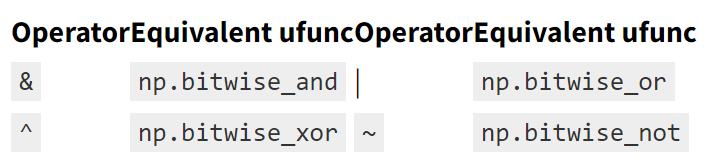
</div>

### Case Study: Counting Rainy Days

In [ ]:
import pandas as pd

rainfall = pd.read_csv('Seattle2014.csv')
rainfall.head()

In [ ]:
# use pandas to extract rainfall inches as a NumPy array
rainfall = rainfall['PRCP'].values
rainfall

In [ ]:
rainfall.shape

In [ ]:
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

In [ ]:
inches

In [ ]:
# Number of days with rainfall between 0.5 and 1.0 inches
np.sum((inches > 0.5) & (inches < 1))

Note that the parentheses here are important - because of operator precedence rules. With parentheses removed this expression would be evaluated as follows, which results in an error.

`inches > (0.5 & inches) < 1`

In [ ]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) & (inches < 0.2)))

### Boolean Arrays as Masks
In the preceding section we looked at aggregates computed directly on Boolean arrays. A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves. 

In [8]:
rng = np.random.RandomState(0)
x = rng.randint(10, size = (3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [9]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [ ]:
np.sum(x < 5)

In [ ]:
x[x < 5]

What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is `True`.

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

In [ ]:
data = np.random.randn(7, 4)
data

Suppose each name corresponds to a row in the data array and we wanted to select all the rows with corresponding name Bob. Like arithmetic operations, comparison with array are also vectorized.

In [ ]:
names == 'Bob'

In [ ]:
data[names == 'Bob']

The boolean array must be of the same length as the array axis it is indexing. You can even mix and match boolean arrays with slices, indices (integers) or fancy indices (sequences of integers) which will be covered later

In [ ]:
data[names == 'Bob', 2:]

In [ ]:
data[names == 'Bob', 3]

In [ ]:
# revisit this example after we cover fancy indexing
data[names == 'Bob', [3, 0]]

To select everything but Bob, you can either use `!=` or negate the condition using `~`

In [ ]:
names != 'Bob'

In [ ]:
data[names != 'Bob']

In [ ]:
data[~(names == 'Bob')]

Selecting two of the three names to combine multiple boolean conditions.

In [ ]:
data[(names == 'Bob') | (names == 'Will')]

**Selecting data from an array by boolean indexing always creates a copy of the data, even if the returned array is unchanged**. Also keep in mind that the Python keywords `and` and `or` do not work with boolean arrays. Use `&` and `|` instead. See the note below 

In [ ]:
result = data[(names == 'Bob') | (names == 'Will')]
result

In [ ]:
result[0, 0] = 1
result

In [ ]:
data

### A Note
One common point of confusion is the difference between the keywords `and` and `or` on one hand, and the operators `&` and `|` on the other hand. When would you use one versus the other?

The difference is this: `and` and `or` gauge the truth or falsehood of one element, while `&` and `|` refer to elemet-wise operation.

In [ ]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

In [ ]:
A or B

In [ ]:
True or False

Setting values with boolean arrays works in a common sense way. To set all of the negative values in data to 0, we only need to do

In [ ]:
data

In [ ]:
data[data < 0]

In [ ]:
data[data < 0] = 0
data

Setting whole rows or columns using a one-dimensional boolean array is also easy

In [ ]:
data[names != 'Joe']

In [ ]:
data[names != 'Joe'] = 7
data

In [ ]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[inches > 0]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

In [ ]:
inches[rainy]

In [ ]:
inches[rainy].shape

### Fancy Indexing
In the previous sections, we saw how to access and modify portions of arrays using simple indices (e.g., `arr[0]`), slices (e.g., `arr[:5]`), and Boolean masks (e.g., `arr[arr > 0]`). In this section, we'll look at another style of array indexing, known as fancy indexing. **It is a term adopted by NumPy to describe indexing using integer arrays**. Fancy indexing is like the simple indexing we've already seen, but we pass arrays of indices in place of single scalars. This allows us to very quickly access and modify complicated subsets of an array's values. Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once.

The data generation functions in `np.random` use a global random seed. To avoid global state, you can use `np.RandomState` to create a random number generator isolated from others

In [10]:
rng = np.random.RandomState(42)

x = rng.randint(100, size = 10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [11]:
# access three different elements
[x[3], x[7], x[2]]

[71, 86, 14]

In [ ]:
# using fancy indexing
x[[3, 7, 2]]

In [ ]:
x[3, 7, 2]

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed

In [ ]:
ind = np.array([[3, 7], [4, 5]])
ind

In [ ]:
x[ind]

To select out a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order

In [12]:
X = np.arange(32).reshape((8, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
X[4]

In [ ]:
X[:3]

In [ ]:
X[[4, 3, 0, 6]]

In [ ]:
X[[4, 3, 0, 6], :]

Using negative indices selects rows from the end

In [4]:
X[[-3, -5, -7]]

NameError: name 'X' is not defined

Fancy indexing also works in multiple dimensions. Like with standard indexing, the first index refers to the row, and the second to the column. Passing multiple index arrays does something slightly different. **It selects a one-dimensional array of elements corresponding to each tuple of indices**. Regardless of how many dimensions the array has (here, only 2), the result of fancy indexing with multiple integer arrays is always one-dimensional.

In [3]:
X = np.arange(12).reshape((3, 4))
X

NameError: name 'np' is not defined

In [ ]:
# two index arrays with the same shape
row = np.array([2, 1, 3])0, 1, 2])
col = np.array([
X[row, col]

In [ ]:
X[row]

Notice that the first value in the result is `X[0, 2]`, the second is `X[1, 1]`, and the third is `X[2, 3]`. The behavior of fancy indexing in the above case is a bit different from what you might have expected. To get the rectangular region formed by selecting a subset of the matrix's rows and columns, see the example below

In [ ]:
X[:, [2, 1, 3]]

In [ ]:
X[[0, 2], 1:3]

### Modifying Values with Fancy Indexing
Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array

In [ ]:
x = np.arange(10)
x

In [ ]:
i = np.array([2, 1, 8, 4])
x[i]

In [ ]:
x[i] = 99
x

We can use any assignment-type operator for this

In [2]:
x[i] -= 10 # x[i] = x[i] - 10
x

NameError: name 'x' is not defined

Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array. We can verify that using the following example

In [ ]:
new_x_slice = x[i] # get a copy to new_x_slice
new_x_slice[:] = 66
print(new_x_slice)

In [ ]:
x

### Combined Indexing
Fancy indexing can be combined with the other indexing schemes we've seen.

In [1]:
X

NameError: name 'X' is not defined

We can combine fancy and simple indices

In [ ]:
X[2, [2, 0, 1]]

We can also combine fancy indexing with slicing

In [ ]:
X[1:, [2, 0, 1]]

And we can combine fancy indexing with masking

In [ ]:
mask = np.array([1, 0, 1, 0], dtype = bool)
mask

In [ ]:
row = np.array([0, 1, 2])

In [ ]:
row[:, np.newaxis]

In [ ]:
X[row[:, np.newaxis], mask]

### Swap Rows and Columns

In [ ]:
x = 1
y = 2
x, y = y, x
print('x', x)
print('y', y)

In [ ]:
t = np.arange(0, 12).reshape(3, 4)
t

In [ ]:
# swap rows
t[[1, 2], :] = t[[2, 1], :]
t

In [ ]:
# swap columns
t[:, [0, 2]] = t[:, [2, 0]]
t

### Sorting Arrays
To return a sorted version of the array without modifying the input, you can use `np.sort`

In [ ]:
# class function
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

In [ ]:
x # the original array is not changed

If you prefer to sort the array in-place, you can instead use the `sort` method of arrays

In [ ]:
# array method
x.sort()
x

In [ ]:
s = [34, 97, -1, 36, 100]

In [ ]:
s.sort()
s

In [ ]:
s1 = [34, 97, -1, 36, 100]

In [ ]:
sorted(s1)

In [ ]:
s1

A related function is `argsort`, which instead returns the indices of the sorted elements

In [ ]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
i

The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on. These indices can then be used (via fancy indexing) to construct the sorted array if desired

In [ ]:
x[i]

#### Sorting Along Rows or Columns
A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the `axis` argument. **Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!**

In [ ]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
X

In [ ]:
# sort each column of X
np.sort(X, axis = 0)

In [ ]:
# sort each row of X
np.sort(X, axis = 1)

#### Partial Sorts: Partitioning
Sometimes we're not interested in sorting the entire array, but simply want to find the `k` smallest values in the array. NumPy provides this in the `np.partition` function. `np.partition` takes an array and a number `k`; the result is a new array with the smallest `k` values to the left of the partition, and the remaining values to the right, in arbitrary order. **Within both partitions (left and right), the elements have arbitrary order.**

In [ ]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

In [ ]:
# if k is negative, the largest k number are put at the end of the array
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, -3)

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array

In [ ]:
X

In [ ]:
np.partition(X, 2, axis = 1)

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots. Finally, just as there is a `np.argsort` that computes indices of the sort, there is a `np.argpartition` that computes indices of the partition